**Regression**

**Melborn Dataset**

In [8]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/daily-minimum-temperatures-in-melbourne (1).xlsx")
data_M = df.to_numpy()

**Prparing Datset**

In [10]:
data = data_M
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_14332\1159894056.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_14332\1159894056.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Initialize ANN Type F1**

In [238]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3 = 5, 120, 20,1  #40
eta = 0.00001
epoch = 100
epsilon = 10**-8 
beta1 = 0.9
beta2 = 0.99

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.1, 0.1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
delta1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
theta14 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
delta2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)
theta24 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
alpha3 = np.random.uniform(a,b,1)
beta3 = np.random.uniform(a,b,1)
gamma3 = np.random.uniform(a,b,1)
delta3 = np.random.uniform(a,b,1)
theta31 = np.random.uniform(a,b,1)
theta32 = np.random.uniform(a,b,1)
theta33 = np.random.uniform(a,b,1)
theta34 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgraddelta1 = 0
Sgraddelta1 = 0
S_hatgraddelta1 = 0
V_hatgraddelta1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

Vgradtheta14 = 0
Sgradtheta14 = 0
S_hatgradtheta14 = 0
V_hatgradtheta14 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgraddelta2 = 0
Sgraddelta2 = 0
S_hatgraddelta2 = 0
V_hatgraddelta2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

Vgradtheta24 = 0
Sgradtheta24 = 0
S_hatgradtheta24 = 0
V_hatgradtheta24 = 0
####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0

Vgradalpha3 = 0
Sgradalpha3 = 0
S_hatgradalpha3 = 0
V_hatgradalpha3 = 0


Vgradbeta3 = 0
Sgradbeta3 = 0
S_hatgradbeta3 = 0
V_hatgradbeta3 = 0

Vgradgamma3 = 0
Sgradgamma3 = 0
S_hatgradgamma3 = 0
V_hatgradgamma3 = 0

Vgraddelta3 = 0
Sgraddelta3 = 0
S_hatgraddelta3 = 0
V_hatgraddelta3 = 0

Vgradtheta31 = 0
Sgradtheta31 = 0
S_hatgradtheta31 = 0
V_hatgradtheta31 = 0

Vgradtheta32 = 0
Sgradtheta32 = 0
S_hatgradtheta32 = 0
V_hatgradtheta32 = 0

Vgradtheta33 = 0
Sgradtheta33 = 0
S_hatgradtheta33 = 0
V_hatgradtheta33 = 0

Vgradtheta34 = 0
Sgradtheta34 = 0
S_hatgradtheta34 = 0
V_hatgradtheta34 = 0
#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)

def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
def F1(x, alpha, beta, gamma, delta, t1, t2, t3,t4):
    return alpha*sigmoid(t1*x) + beta* Tanh(t2*x) + gamma* relu(t3*x) + delta*purline(t4*x)
#Fstar
def F1a(x,t):
    return sigmoid(t*x)
def F1b(x,t):
    return Tanh(t*x)
def F1g(x,t):
    return relu(t*x)
def F1d(x,t):
    return purline(t*x)
    
def F1t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F1t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F1t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)

def F1t4(x, delat,t):
    return delat*x*dfpurline(t*x)
    
#Fprim
def dfF1(x,alpha, beta, gamma, delta, t1, t2, t3,t4):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x) +t4*delta


**implemention ANN Type F1**

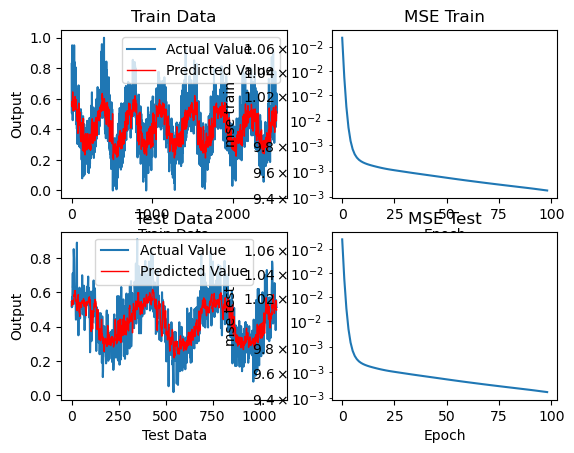

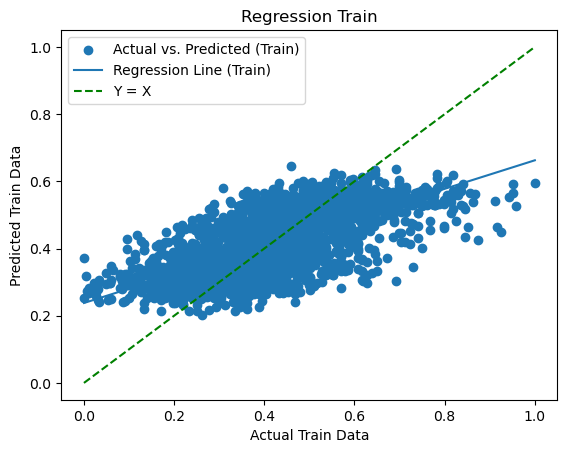

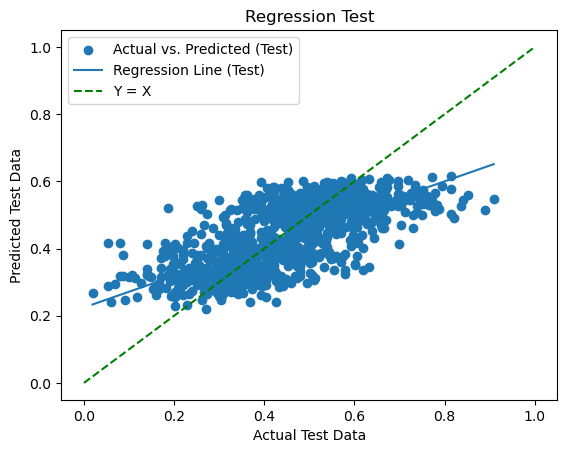

In [136]:
for t in range(epoch):
    error = np.zeros(num_train)
    r     =np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, alpha3, beta3, gamma3, delta3, theta31, theta32, theta33, theta34)
        target = data[i, 5]
        error[i] = (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        #fprim
        A = dfF1(net3,alpha3, beta3, gamma3, delta3, theta31, theta32, theta33,theta34)
        B = dfF1(net2,alpha2, beta2, gamma2, delta2, theta21, theta22, theta23,theta24)
        B = np.diag(B)
        C = dfF1(net1,alpha1, beta1, gamma1, delta1, theta11, theta12, theta13,theta14)
        C = np.diag(C)

        #Backpropagation
        #layer3
        gradw3       = 2*(k1+k2)*r[i]*-1*A*o2
        Vgradw3= beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3 = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3 = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3 = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = 2*(k1+k2)*r[i]*-1*A
        Vgradbi3= beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3 = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3          -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)

        gradalpha3   =  2*(k1+k2)*r[i]*-1*F1a(net3, theta31)
        Vgradalpha3= beta1*Vgradalpha3 + (1-beta1)*gradalpha3
        Sgradalpha3 = beta2*Sgradalpha3 + (1-beta2)*(gradalpha3)**2
        V_hatgradalpha3 = Vgradalpha3/(1-beta1**(t+1))
        S_hatgradalpha3 = Sgradalpha3/(1-beta2**(t+1))
        alpha3         -= (eta*V_hatgradalpha3)/(np.sqrt(S_hatgradalpha3)+epsilon)
        
        gradbeta3    = 2*(k1+k2)*r[i]*-1*F1b(net3, theta32)
        Vgradbeta3= beta1*Vgradbeta3 + (1-beta1)*gradbeta3
        Sgradbeta3 = beta2*Sgradbeta3 + (1-beta2)*(gradbeta3)**2
        V_hatgradbeta3 = Vgradbeta3/(1-beta1**(t+1))
        S_hatgradbeta3 = Sgradbeta3/(1-beta2**(t+1))
        beta3          -= (eta*V_hatgradbeta3)/(np.sqrt(S_hatgradbeta3)+epsilon)

        gradgamma3   = 2*(k1+k2)*r[i]*-1*F1g(net3, theta33)
        Vgradgamma3= beta1*Vgradgamma3 + (1-beta1)*gradgamma3
        Sgradgamma3= beta2*Sgradgamma3 + (1-beta2)*(gradgamma3)**2
        V_hatgradgamma3 = Vgradgamma3/(1-beta1**(t+1))
        S_hatgradgamma3 = Sgradgamma3/(1-beta2**(t+1))
        gamma3          -= (eta*V_hatgradgamma3)/(np.sqrt(S_hatgradgamma3)+epsilon)
        
        graddelta3   = 2*(k1+k2)*r[i]*-1*F1d(net3, theta34)
        Vgraddelta3= beta1*Vgraddelta3 + (1-beta1)*graddelta3
        Sgraddelta3= beta2*Sgraddelta3 + (1-beta2)*(graddelta3)**2
        V_hatgraddelta3 = Vgraddelta3/(1-beta1**(t+1))
        S_hatgraddelta3 = Sgraddelta3/(1-beta2**(t+1))
        delta3          -= (eta*V_hatgraddelta3)/(np.sqrt(S_hatgraddelta3)+epsilon)
        
        gradtheta31  = 2*(k1+k2)*r[i]*-1*F1t1(net3,alpha3,theta31)
        Vgradtheta31= beta1*Vgradtheta31 + (1-beta1)*gradtheta31
        Sgradtheta31= beta2*Sgradtheta31 + (1-beta2)*(gradtheta31)**2
        V_hatgradtheta31 = Vgradtheta31/(1-beta1**(t+1))
        S_hatgradtheta31 = Sgradtheta31/(1-beta2**(t+1))
        theta31      -= (eta*V_hatgradtheta31)/(np.sqrt(S_hatgradtheta31)+epsilon)
        
        gradtheta32   = 2*(k1+k2)*r[i]*-1*F1t2(net3,beta3,theta32)
        Vgradtheta32= beta1*Vgradtheta32 + (1-beta1)*gradtheta32
        Sgradtheta32= beta2*Sgradtheta32 + (1-beta2)*(gradtheta32)**2
        V_hatgradtheta32 = Vgradtheta32/(1-beta1**(t+1))
        S_hatgradtheta32 = Sgradtheta32/(1-beta2**(t+1))
        theta32       -=  (eta*V_hatgradtheta32)/(np.sqrt(S_hatgradtheta32)+epsilon)
        
        gradtheta33      = 2*(k1+k2)*r[i]*-1*F1t3(net3,gamma3,theta33)
        Vgradtheta33= beta1*Vgradtheta33 + (1-beta1)*gradtheta33
        Sgradtheta33= beta2*Sgradtheta33 + (1-beta2)*(gradtheta33)**2
        V_hatgradtheta33 = Vgradtheta33/(1-beta1**(t+1))
        S_hatgradtheta33 = Sgradtheta33/(1-beta2**(t+1))
        theta33        -=  (eta*V_hatgradtheta33)/(np.sqrt(S_hatgradtheta33)+epsilon)
        
        gradtheta34    = 2*(k1+k2)*r[i]*-1*F1t4(net3,delta3,theta34)
        Vgradtheta34= beta1*Vgradtheta34 + (1-beta1)*gradtheta34
        Sgradtheta34= beta2*Sgradtheta34 + (1-beta2)*(gradtheta34)**2
        V_hatgradtheta34 = Vgradtheta34/(1-beta1**(t+1))
        S_hatgradtheta34 = Sgradtheta34/(1-beta2**(t+1))
        theta34        -= (eta*V_hatgradtheta34)/(np.sqrt(S_hatgradtheta34)+epsilon)
        
        #layer2
        gradw2     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(w3,B), o1)
        Vgradw2 = beta1*Vgradw2  + (1-beta1)*gradw2 
        Sgradw2 = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2        -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2    = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,B).reshape(n2)
        Vgradbi2 = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2 = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2       -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1a(net2, theta21))
        Vgradalpha2 = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2= beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2     -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1b(net2, theta22))
        Vgradbeta2 = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2= beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2      -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1g(net2, theta23))
        Vgradgamma2 = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2= beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2      -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        graddelta2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1d(net2, theta24))
        Vgraddelta2 = beta1*Vgraddelta2  + (1-beta1)*graddelta2 
        Sgraddelta2= beta2*Sgraddelta2  + (1-beta2)*(graddelta2)**2
        V_hatgraddelta2  = Vgraddelta2 /(1-beta1**(t+1))
        S_hatgraddelta2  = Sgraddelta2 /(1-beta2**(t+1))
        delta2     -= (eta*V_hatgraddelta2)/(np.sqrt(S_hatgraddelta2)+epsilon)
        
        gradtheta21 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t2(net2,beta2, theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22= beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23= beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)
        
        gradtheta24 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t4(net2,delta2,theta24))
        Vgradtheta24 = beta1*Vgradtheta24  + (1-beta1)*gradtheta24 
        Sgraddelta24= beta2*Sgradtheta24  + (1-beta2)*(gradtheta24)**2
        V_hatgradtheta24  = Vgradtheta24 /(1-beta1**(t+1))
        S_hatgradtheta24  = Sgradtheta24 /(1-beta2**(t+1))
        theta24     -= (eta*V_hatgradtheta24)/(np.sqrt(S_hatgradtheta24)+epsilon)
        
        #layer1
        gradw1     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(np.dot(w3,B), np.dot(w2, C)),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1= beta2*Sgradw1  + (1-beta2)*(gradw1)**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))    
        w1       -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1    = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3,B), np.dot(w2, C)).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1 
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))         
        bi1      -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1a(net1, theta11)))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1    -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1  = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1b(net1, theta12)))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1 = beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1 /(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1 /(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1g(net1, theta13)))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1 + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        graddelta1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1d(net1, theta14)))
        Vgraddelta1 = beta1*Vgraddelta1  + (1-beta1)*graddelta1 
        Sgraddelta1=  beta2*Sgraddelta1  + (1-beta2)*(graddelta1)**2
        V_hatgraddelta1  = Vgraddelta1 /(1-beta1**(t+1))
        S_hatgraddelta1  = Sgraddelta1 /(1-beta2**(t+1))
        delta1     -= (eta*V_hatgraddelta1)/(np.sqrt(S_hatgraddelta1)+epsilon)
        
        gradtheta11 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t1(net1,alpha1, theta11)))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t2(net1,beta1, theta12)))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta12     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t3(net1,gamma1, theta13)))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)
        
        gradtheta14 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t4(net1,delta1, theta14)))
        Vgradtheta14 = beta1*Vgradtheta14  + (1-beta1)*gradtheta14 
        Sgraddelta14 = beta2*Sgradtheta14  + (1-beta2)*(gradtheta14)**2
        V_hatgradtheta14  = Vgradtheta14 /(1-beta1**(t+1))
        S_hatgradtheta14  = Sgradtheta14 /(1-beta2**(t+1))
        theta14     -= (eta*V_hatgradtheta14)/(np.sqrt(S_hatgradtheta14)+epsilon)
        
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]                              
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, alpha3, beta3, gamma3, delta3, theta31, theta32, theta33, theta34)           
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] =  (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2
    mse_train[t] = np.mean(error_square_train)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, alpha3, beta3, gamma3, delta3, theta31, theta32, theta33, theta34) 
        output_data_test[i] = o3
        target = data[num_train + i, 5]
        error[i] = (target - o3) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2 
    mse_test[t] = np.mean(error_square_train)
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')
    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')
    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize ANN TypeF2**

In [98]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3 = 5, 120, 30,1   #40
eta = 0.000002
epsilon = 10**-8 
beta1 = 0.9
beta2 = 0.99
epoch =42

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

k1 = 0.6
k2 = 0.4
a = -0.1
b = 0.1

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
theta3 = np.random.uniform(a,b,1)


# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0

Vgradtheta3 = 0
Sgradtheta3 = 0
S_hatgradtheta3 = 0
V_hatgradtheta3 = 0
#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)
    
def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
#F2 for layer1, layer2
def F2(x, alpha, beta, gamma,t1, t2, t3):
    return alpha*sigmoid(t1*x) + beta* Tanh(t2*x) + gamma* relu(t3*x) 
    
#Fstar
def F2a(x,t):
    return sigmoid(t*x)
def F2b(x,t):
    return Tanh(t*x)
def F2g(x,t):
    return relu(t*x)
   
def F2t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F2t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F2t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)
      
#Fprim
def dfF2(x,alpha, beta, gamma, t1,t2, t3):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x)

# F1 for latest layer
def F1(x, t):
    return purline(t*x)
#f prim
def dfF1(x, t):
    return t
#F1 star
def F1t4(x,t):
    return x
    

**implemention ANN Type F2**

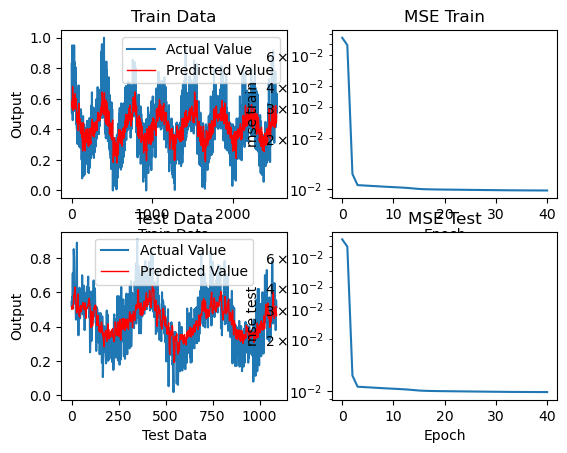

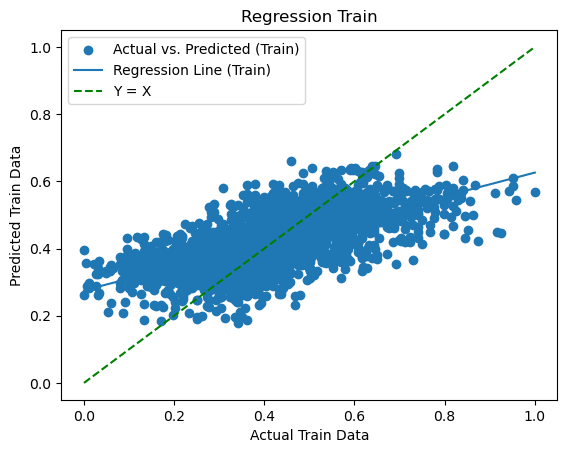

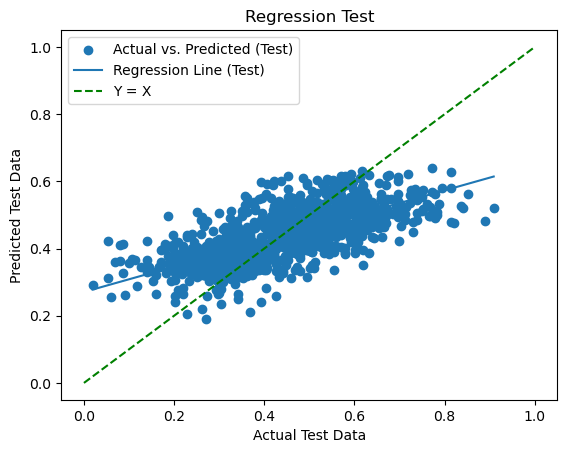

In [101]:
for t in range(epoch):
    error = np.zeros(num_train)
    r     = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3,theta3)
        target = data[i, 5]
        error[i] = (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

        #fprim
        A = dfF1(net3, theta3)
        B = dfF2(net2,alpha2, beta2, gamma2, theta21, theta22, theta23)
        B = np.diag(B)
        C = dfF2(net1,alpha1, beta1, gamma1, theta11, theta12, theta13,)
        C = np.diag(C)

        #Backpropagation
        
        #layer3
        gradw3       = 2*(k1+k2)*r[i]*-1*A*o2
        Vgradw3= beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3 = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3 = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3 = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = 2*(k1+k2)*r[i]*-1*A
        Vgradbi3= beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3 = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3          -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)
        
        gradtheta3   = 2*(k1+k2)*r[i]*-1*F1t4(net3,theta3)
        Vgradtheta3= beta1*Vgradtheta3 + (1-beta1)*gradtheta3
        Sgradtheta3= beta2*Sgradtheta3 + (1-beta2)*(gradtheta3)**2
        V_hatgradtheta3 = Vgradtheta3/(1-beta1**(t+1))
        S_hatgradtheta3 = Sgradtheta3/(1-beta2**(t+1))
        theta3       -= (eta*V_hatgradtheta3)/(np.sqrt(S_hatgradtheta3)+epsilon)
        
        #layer2
        gradw2     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(w3,B), o1)
        Vgradw2 = beta1*Vgradw2  + (1-beta1)*gradw2 
        Sgradw2 = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2        -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2    = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,B).reshape(n2)
        Vgradbi2 = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2 = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2       -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2a(net2,theta21))
        Vgradalpha2 = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2= beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2     -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2b(net2, theta22))
        Vgradbeta2 = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2= beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2      -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2g(net2, theta23))
        Vgradgamma2 = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2= beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2      -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        gradtheta21 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2t2(net2,beta2, theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22= beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23= beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)
        
        
        #layer1
        gradw1     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(np.dot(w3,B), np.dot(w2, C)),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1= beta2*Sgradw1  + (1-beta2)*(gradw1)**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))    
        w1       -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1    = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3,B), np.dot(w2, C)).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1 
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))         
        bi1      -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2a(net1, theta11)))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1    -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1  = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2b(net1, theta12)))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1 = beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1 /(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1 /(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2g(net1, theta13)))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1 + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        gradtheta11 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2t1(net1,alpha1, theta11)))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2t2(net1,beta1, theta12)))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta12     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2t3(net1,gamma1, theta13)))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)
     
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]                              
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1, theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2, theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, theta3)           # 1 * 1
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] =  (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2
    mse_train[t] = np.mean(error_square_train)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3,theta3) 
        output_data_test[i] = o3
        target = data[num_train + i, 5]
        error[i] = (target - o3) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2 
    mse_test[t] = np.mean(error_square_train)
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')
    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')
    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**Video Dataset**

In [103]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/Video surveillance Dataset.xlsx")
data_V = df.to_numpy()

**Preparing Dataset**

In [106]:
data = data_V
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_14332\3080734980.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_14332\3080734980.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**initialize ANN Type F1**

In [196]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3 = 5, 120, 30,1  #40
eta = 0.00001
epoch = 25
epsilon = 10**-8 
beta1 = 0.9
beta2 = 0.99
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.1, 0.1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
delta1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
theta14 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(1)
beta2 = np.random.uniform(1)
gamma2 = np.random.uniform(1)
delta2 = np.random.uniform(1)
theta21 = np.random.uniform(1)
theta22 = np.random.uniform(1)
theta23 = np.random.uniform(1)
theta24 = np.random.uniform(1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
alpha3 = np.random.uniform(a,b,1)
beta3 = np.random.uniform(a,b,1)
gamma3 = np.random.uniform(a,b,1)
delta3 = np.random.uniform(a,b,1)
theta31 = np.random.uniform(a,b,1)
theta32 = np.random.uniform(a,b,1)
theta33 = np.random.uniform(a,b,1)
theta34 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgraddelta1 = 0
Sgraddelta1 = 0
S_hatgraddelta1 = 0
V_hatgraddelta1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

Vgradtheta14 = 0
Sgradtheta14 = 0
S_hatgradtheta14 = 0
V_hatgradtheta14 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgraddelta2 = 0
Sgraddelta2 = 0
S_hatgraddelta2 = 0
V_hatgraddelta2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

Vgradtheta24 = 0
Sgradtheta24 = 0
S_hatgradtheta24 = 0
V_hatgradtheta24 = 0
####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0

Vgradalpha3 = 0
Sgradalpha3 = 0
S_hatgradalpha3 = 0
V_hatgradalpha3 = 0


Vgradbeta3 = 0
Sgradbeta3 = 0
S_hatgradbeta3 = 0
V_hatgradbeta3 = 0

Vgradgamma3 = 0
Sgradgamma3 = 0
S_hatgradgamma3 = 0
V_hatgradgamma3 = 0

Vgraddelta3 = 0
Sgraddelta3 = 0
S_hatgraddelta3 = 0
V_hatgraddelta3 = 0

Vgradtheta31 = 0
Sgradtheta31 = 0
S_hatgradtheta31 = 0
V_hatgradtheta31 = 0

Vgradtheta32 = 0
Sgradtheta32 = 0
S_hatgradtheta32 = 0
V_hatgradtheta32 = 0

Vgradtheta33 = 0
Sgradtheta33 = 0
S_hatgradtheta33 = 0
V_hatgradtheta33 = 0

Vgradtheta34 = 0
Sgradtheta34 = 0
S_hatgradtheta34 = 0
V_hatgradtheta34 = 0
#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)

def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
def F1(x, alpha, beta, gamma, delta, t1, t2, t3,t4):
    return alpha*sigmoid(t1*x) + beta* Tanh(t2*x) + gamma* relu(t3*x) + delta*purline(t4*x)
#Fstar
def F1a(x,t):
    return sigmoid(t*x)
def F1b(x,t):
    return Tanh(t*x)
def F1g(x,t):
    return relu(t*x)
def F1d(x,t):
    return purline(t*x)
    
def F1t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F1t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F1t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)

def F1t4(x, delat,t):
    return delat*x*dfpurline(t*x)
    
#Fprim
def dfF1(x,alpha, beta, gamma, delta, t1, t2, t3,t4):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x) +t4*delta


**Implemeniton ANN Type F1**

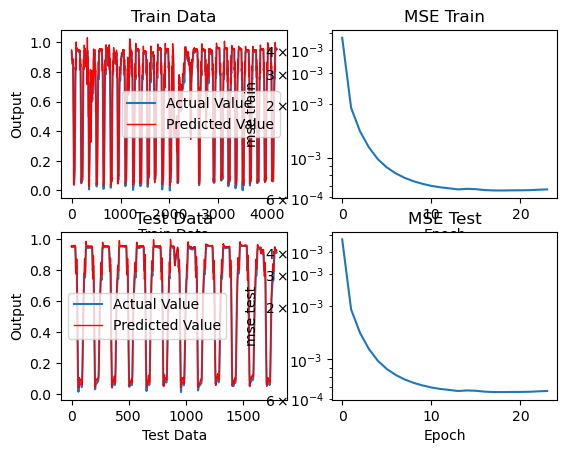

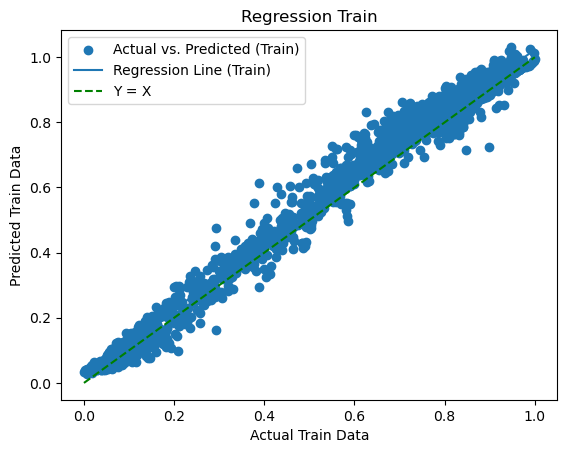

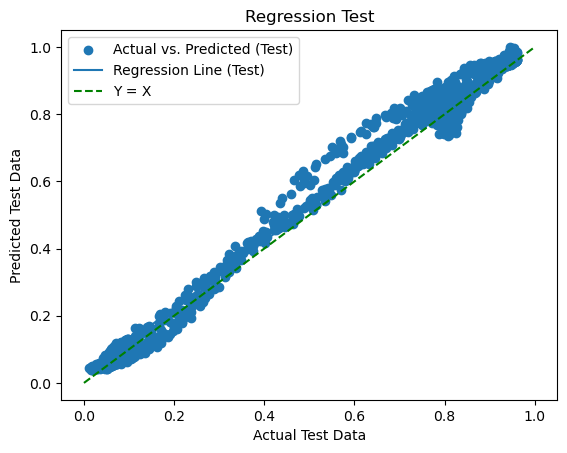

In [199]:
for t in range(epoch):
    error = np.zeros(num_train)
    r     =np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, alpha3, beta3, gamma3, delta3, theta31, theta32, theta33, theta34)
        target = data[i, 5]
        error[i] = (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        #fprim
        A = dfF1(net3,alpha3, beta3, gamma3, delta3, theta31, theta32, theta33,theta34)
        B = dfF1(net2,alpha2, beta2, gamma2, delta2, theta21, theta22, theta23,theta24)
        B = np.diag(B)
        C = dfF1(net1,alpha1, beta1, gamma1, delta1, theta11, theta12, theta13,theta14)
        C = np.diag(C)

        #Backpropagation
        #layer3
        gradw3       = 2*(k1+k2)*r[i]*-1*A*o2
        Vgradw3= beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3 = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3 = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3 = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = 2*(k1+k2)*r[i]*-1*A
        Vgradbi3= beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3 = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3          -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)

        gradalpha3   =  2*(k1+k2)*r[i]*-1*F1a(net3, theta31)
        Vgradalpha3= beta1*Vgradalpha3 + (1-beta1)*gradalpha3
        Sgradalpha3 = beta2*Sgradalpha3 + (1-beta2)*(gradalpha3)**2
        V_hatgradalpha3 = Vgradalpha3/(1-beta1**(t+1))
        S_hatgradalpha3 = Sgradalpha3/(1-beta2**(t+1))
        alpha3         -= (eta*V_hatgradalpha3)/(np.sqrt(S_hatgradalpha3)+epsilon)
        
        gradbeta3    = 2*(k1+k2)*r[i]*-1*F1b(net3, theta32)
        Vgradbeta3= beta1*Vgradbeta3 + (1-beta1)*gradbeta3
        Sgradbeta3 = beta2*Sgradbeta3 + (1-beta2)*(gradbeta3)**2
        V_hatgradbeta3 = Vgradbeta3/(1-beta1**(t+1))
        S_hatgradbeta3 = Sgradbeta3/(1-beta2**(t+1))
        beta3          -= (eta*V_hatgradbeta3)/(np.sqrt(S_hatgradbeta3)+epsilon)

        gradgamma3   = 2*(k1+k2)*r[i]*-1*F1g(net3, theta33)
        Vgradgamma3= beta1*Vgradgamma3 + (1-beta1)*gradgamma3
        Sgradgamma3= beta2*Sgradgamma3 + (1-beta2)*(gradgamma3)**2
        V_hatgradgamma3 = Vgradgamma3/(1-beta1**(t+1))
        S_hatgradgamma3 = Sgradgamma3/(1-beta2**(t+1))
        gamma3          -= (eta*V_hatgradgamma3)/(np.sqrt(S_hatgradgamma3)+epsilon)
        
        graddelta3   = 2*(k1+k2)*r[i]*-1*F1d(net3, theta34)
        Vgraddelta3= beta1*Vgraddelta3 + (1-beta1)*graddelta3
        Sgraddelta3= beta2*Sgraddelta3 + (1-beta2)*(graddelta3)**2
        V_hatgraddelta3 = Vgraddelta3/(1-beta1**(t+1))
        S_hatgraddelta3 = Sgraddelta3/(1-beta2**(t+1))
        delta3          -= (eta*V_hatgraddelta3)/(np.sqrt(S_hatgraddelta3)+epsilon)
        
        gradtheta31  = 2*(k1+k2)*r[i]*-1*F1t1(net3,alpha3,theta31)
        Vgradtheta31= beta1*Vgradtheta31 + (1-beta1)*gradtheta31
        Sgradtheta31= beta2*Sgradtheta31 + (1-beta2)*(gradtheta31)**2
        V_hatgradtheta31 = Vgradtheta31/(1-beta1**(t+1))
        S_hatgradtheta31 = Sgradtheta31/(1-beta2**(t+1))
        theta31      -= (eta*V_hatgradtheta31)/(np.sqrt(S_hatgradtheta31)+epsilon)
        
        gradtheta32   = 2*(k1+k2)*r[i]*-1*F1t2(net3,beta3,theta32)
        Vgradtheta32= beta1*Vgradtheta32 + (1-beta1)*gradtheta32
        Sgradtheta32= beta2*Sgradtheta32 + (1-beta2)*(gradtheta32)**2
        V_hatgradtheta32 = Vgradtheta32/(1-beta1**(t+1))
        S_hatgradtheta32 = Sgradtheta32/(1-beta2**(t+1))
        theta32       -=  (eta*V_hatgradtheta32)/(np.sqrt(S_hatgradtheta32)+epsilon)
        
        gradtheta33      = 2*(k1+k2)*r[i]*-1*F1t3(net3,gamma3,theta33)
        Vgradtheta33= beta1*Vgradtheta33 + (1-beta1)*gradtheta33
        Sgradtheta33= beta2*Sgradtheta33 + (1-beta2)*(gradtheta33)**2
        V_hatgradtheta33 = Vgradtheta33/(1-beta1**(t+1))
        S_hatgradtheta33 = Sgradtheta33/(1-beta2**(t+1))
        theta33        -=  (eta*V_hatgradtheta33)/(np.sqrt(S_hatgradtheta33)+epsilon)
        
        gradtheta34    = 2*(k1+k2)*r[i]*-1*F1t4(net3,delta3,theta34)
        Vgradtheta34= beta1*Vgradtheta34 + (1-beta1)*gradtheta34
        Sgradtheta34= beta2*Sgradtheta34 + (1-beta2)*(gradtheta34)**2
        V_hatgradtheta34 = Vgradtheta34/(1-beta1**(t+1))
        S_hatgradtheta34 = Sgradtheta34/(1-beta2**(t+1))
        theta34        -= (eta*V_hatgradtheta34)/(np.sqrt(S_hatgradtheta34)+epsilon)
        
        #layer2
        gradw2     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(w3,B), o1)
        Vgradw2 = beta1*Vgradw2  + (1-beta1)*gradw2 
        Sgradw2 = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2        -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2    = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,B).reshape(n2)
        Vgradbi2 = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2 = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2       -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1a(net2, theta21))
        Vgradalpha2 = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2= beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2     -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1b(net2, theta22))
        Vgradbeta2 = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2= beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2      -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1g(net2, theta23))
        Vgradgamma2 = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2= beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2      -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        graddelta2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1d(net2, theta24))
        Vgraddelta2 = beta1*Vgraddelta2  + (1-beta1)*graddelta2 
        Sgraddelta2= beta2*Sgraddelta2  + (1-beta2)*(graddelta2)**2
        V_hatgraddelta2  = Vgraddelta2 /(1-beta1**(t+1))
        S_hatgraddelta2  = Sgraddelta2 /(1-beta2**(t+1))
        delta2     -= (eta*V_hatgraddelta2)/(np.sqrt(S_hatgraddelta2)+epsilon)
        
        gradtheta21 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t2(net2,beta2, theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22= beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23= beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)
        
        gradtheta24 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F1t4(net2,delta2,theta24))
        Vgradtheta24 = beta1*Vgradtheta24  + (1-beta1)*gradtheta24 
        Sgraddelta24= beta2*Sgradtheta24  + (1-beta2)*(gradtheta24)**2
        V_hatgradtheta24  = Vgradtheta24 /(1-beta1**(t+1))
        S_hatgradtheta24  = Sgradtheta24 /(1-beta2**(t+1))
        theta24     -= (eta*V_hatgradtheta24)/(np.sqrt(S_hatgradtheta24)+epsilon)
        
        #layer1
        gradw1     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(np.dot(w3,B), np.dot(w2, C)),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1= beta2*Sgradw1  + (1-beta2)*(gradw1)**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))    
        w1       -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1    = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3,B), np.dot(w2, C)).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1 
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))         
        bi1      -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1a(net1, theta11)))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1    -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1  = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1b(net1, theta12)))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1 = beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1 /(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1 /(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1g(net1, theta13)))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1 + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        graddelta1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1d(net1, theta14)))
        Vgraddelta1 = beta1*Vgraddelta1  + (1-beta1)*graddelta1 
        Sgraddelta1=  beta2*Sgraddelta1  + (1-beta2)*(graddelta1)**2
        V_hatgraddelta1  = Vgraddelta1 /(1-beta1**(t+1))
        S_hatgraddelta1  = Sgraddelta1 /(1-beta2**(t+1))
        delta1     -= (eta*V_hatgraddelta1)/(np.sqrt(S_hatgraddelta1)+epsilon)
        
        gradtheta11 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t1(net1,alpha1, theta11)))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t2(net1,beta1, theta12)))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta12     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t3(net1,gamma1, theta13)))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)
        
        gradtheta14 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F1t4(net1,delta1, theta14)))
        Vgradtheta14 = beta1*Vgradtheta14  + (1-beta1)*gradtheta14 
        Sgraddelta14 = beta2*Sgradtheta14  + (1-beta2)*(gradtheta14)**2
        V_hatgradtheta14  = Vgradtheta14 /(1-beta1**(t+1))
        S_hatgradtheta14  = Sgradtheta14 /(1-beta2**(t+1))
        theta14     -= (eta*V_hatgradtheta14)/(np.sqrt(S_hatgradtheta14)+epsilon)
        
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]                              
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, alpha3, beta3, gamma3, delta3, theta31, theta32, theta33, theta34)           
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] =  (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2
    mse_train[t] = np.mean(error_square_train)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, alpha3, beta3, gamma3, delta3, theta31, theta32, theta33, theta34) 
        output_data_test[i] = o3
        target = data[num_train + i, 5]
        error[i] = (target - o3) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2 
    mse_test[t] = np.mean(error_square_train)
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')
    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')
    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize ANN Type F2**

In [262]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2, n3 = 5, 120, 30,1   #40
eta = 0.00001
epoch = 5
epsilon = 10**-8 
beta1 = 0.9
beta2 = 0.99
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.1, 0.1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
theta3 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0

Vgradtheta3 = 0
Sgradtheta3 = 0
S_hatgradtheta3 = 0
V_hatgradtheta3 = 0
#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)
    
def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
#F2 for layer1, layer2
def F2(x, alpha, beta, gamma,t1, t2, t3):
    return alpha*sigmoid(t1*x) + beta* Tanh(t2*x) + gamma* relu(t3*x) 
    
#Fstar
def F2a(x,t):
    return sigmoid(t*x)
def F2b(x,t):
    return Tanh(t*x)
def F2g(x,t):
    return relu(t*x)
   
def F2t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F2t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F2t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)
      
#Fprim
def dfF2(x,alpha, beta, gamma, t1,t2, t3):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x)

# F1 for latest layer
def F1(x, t):
    return purline(t*x)
#f prim
def dfF1(x, t):
    return t
#F1 star
def F1t4(x,t):
    return x


**implemention ANN Type F2**

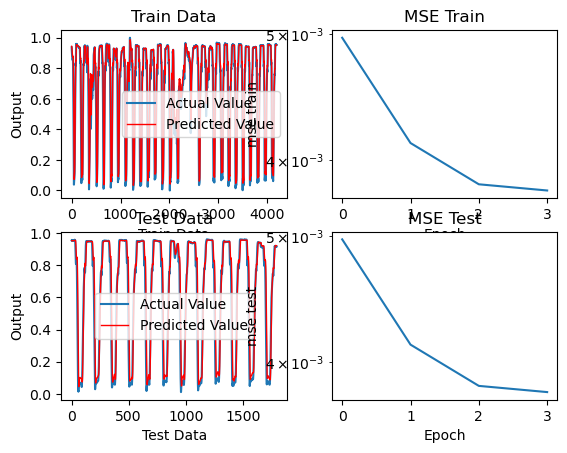

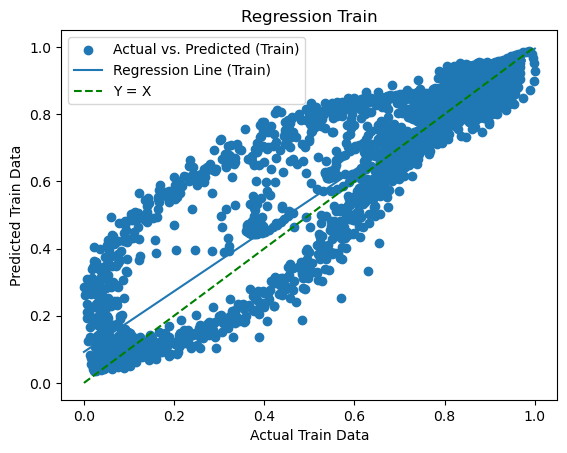

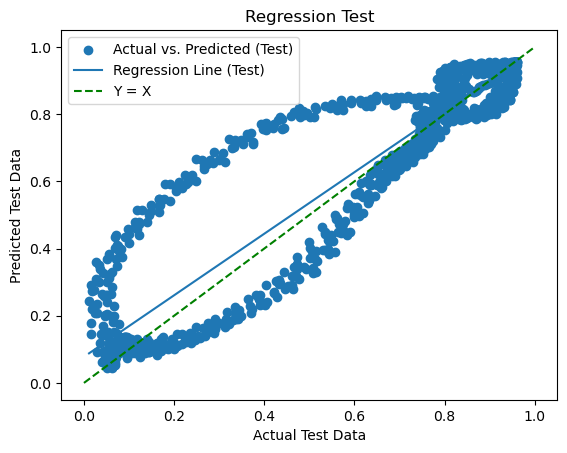

In [265]:
for t in range(epoch):
    error = np.zeros(num_train)
    r     = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3,theta3)
        target = data[i, 5]
        error[i] = (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

        #fprim
        A = dfF1(net3, theta3)
        B = dfF2(net2,alpha2, beta2, gamma2, theta21, theta22, theta23)
        B = np.diag(B)
        C = dfF2(net1,alpha1, beta1, gamma1, theta11, theta12, theta13,)
        C = np.diag(C)

        #Backpropagation
        
        #layer3
        gradw3       = 2*(k1+k2)*r[i]*-1*A*o2
        Vgradw3= beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3 = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3 = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3 = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = 2*(k1+k2)*r[i]*-1*A
        Vgradbi3= beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3 = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3          -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)
        
        gradtheta3   = 2*(k1+k2)*r[i]*-1*F1t4(net3,theta3)
        Vgradtheta3= beta1*Vgradtheta3 + (1-beta1)*gradtheta3
        Sgradtheta3= beta2*Sgradtheta3 + (1-beta2)*(gradtheta3)**2
        V_hatgradtheta3 = Vgradtheta3/(1-beta1**(t+1))
        S_hatgradtheta3 = Sgradtheta3/(1-beta2**(t+1))
        theta3       -= (eta*V_hatgradtheta3)/(np.sqrt(S_hatgradtheta3)+epsilon)
        
        #layer2
        gradw2     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(w3,B), o1)
        Vgradw2 = beta1*Vgradw2  + (1-beta1)*gradw2 
        Sgradw2 = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2        -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2    = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,B).reshape(n2)
        Vgradbi2 = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2 = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2       -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2a(net2,theta21))
        Vgradalpha2 = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2= beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2     -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2b(net2, theta22))
        Vgradbeta2 = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2= beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2      -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2  = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2g(net2, theta23))
        Vgradgamma2 = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2= beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2      -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        gradtheta21 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2t2(net2,beta2, theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22= beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23 = 2*(k1+k2)*r[i]*-1*A*np.dot(w3,F2t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23= beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)
        
        
        #layer1
        gradw1     = 2*(k1+k2)*r[i]*-1*A*np.outer(np.dot(np.dot(w3,B), np.dot(w2, C)),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1= beta2*Sgradw1  + (1-beta2)*(gradw1)**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))    
        w1       -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1    = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3,B), np.dot(w2, C)).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1 
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))         
        bi1      -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2a(net1, theta11)))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1    -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1  = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2b(net1, theta12)))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1 = beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1 /(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1 /(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2g(net1, theta13)))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1 + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        gradtheta11 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2t1(net1,alpha1, theta11)))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2t2(net1,beta1, theta12)))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta12     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = 2*(k1+k2)*r[i]*-1*A*np.dot(np.dot(w3, B),np.dot(w2, F2t3(net1,gamma1, theta13)))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)
     
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]                              
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1, theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2, theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3, theta3)           # 1 * 1
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] =  (target - o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2
    mse_train[t] = np.mean(error_square_train)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = F1(net3,theta3) 
        output_data_test[i] = o3
        target = data[num_train + i, 5]
        error[i] = (target - o3) 
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2 
    mse_test[t] = np.mean(error_square_train)
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')
    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')
    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**Classification**

**Glass Dataset**

In [2]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/glass.xlsx")
data_G = df.to_numpy()

In [50]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)
data = data_G

input = data_G[:, :9]
output = data_G[:, 9]
f  =input.shape[1]

def normalizeData(input):
  for ii in range(f):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii]) - np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_G)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**initialize ANN Type F1**

In [241]:
n0, n1, n2, n3 = input.shape[1], 50, 18,output.shape[1]
eta = 0.0000001
epoch = 40
epsilon = 10**-8 
beta1 = 0.999
beta2 = 0.99999

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.2, 0.2
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
delta1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
theta14 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
delta2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)
theta24 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
alpha3 = np.random.uniform(a,b,1)
beta3 = np.random.uniform(a,b,1)
gamma3 = np.random.uniform(a,b,1)
delta3 = np.random.uniform(a,b,1)
theta31 = np.random.uniform(a,b,1)
theta32 = np.random.uniform(a,b,1)
theta33 = np.random.uniform(a,b,1)
theta34 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgraddelta1 = 0
Sgraddelta1 = 0
S_hatgraddelta1 = 0
V_hatgraddelta1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

Vgradtheta14 = 0
Sgradtheta14 = 0
S_hatgradtheta14 = 0
V_hatgradtheta14 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgraddelta2 = 0
Sgraddelta2 = 0
S_hatgraddelta2 = 0
V_hatgraddelta2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

Vgradtheta24 = 0
Sgradtheta24 = 0
S_hatgradtheta24 = 0
V_hatgradtheta24 = 0
####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0
#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)

def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
def F1(x, alpha, beta, gamma, delta, t1, t2, t3,t4):
    return alpha*sigmoid(t1*x) + beta*Tanh(t2*x) + gamma*relu(t3*x) + delta*purline(t4*x)
#Fstar
def F1a(x,t):
    return sigmoid(t*x)
def F1b(x,t):
    return Tanh(t*x)
def F1g(x,t):
    return relu(t*x)
def F1d(x,t):
    return purline(t*x)
    
def F1t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F1t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F1t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)

def F1t4(x, delat,t):
    return delat*x*dfpurline(t*x)
    
#Fprim
def dfF1(x,alpha, beta, gamma, delta, t1, t2, t3,t4):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x) +t4*delta

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**Implemention ANN Type F1**

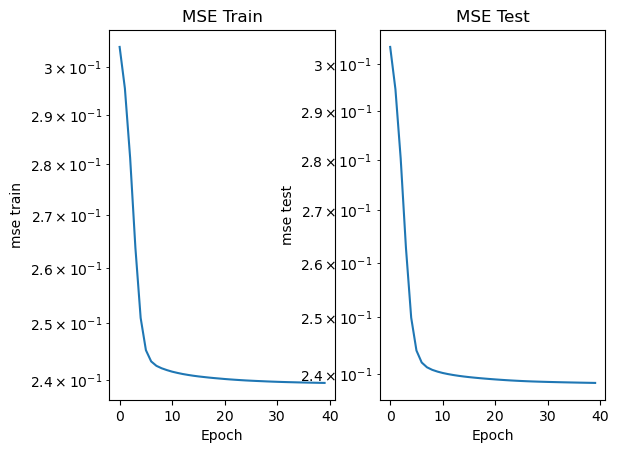

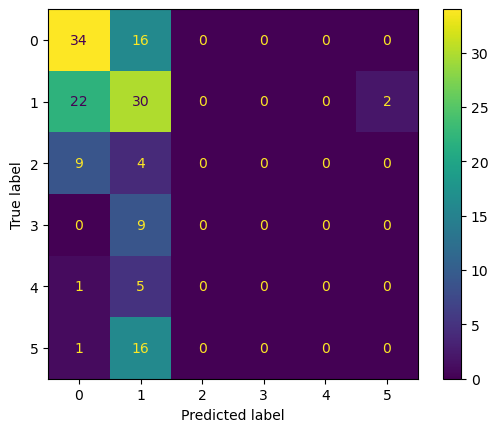

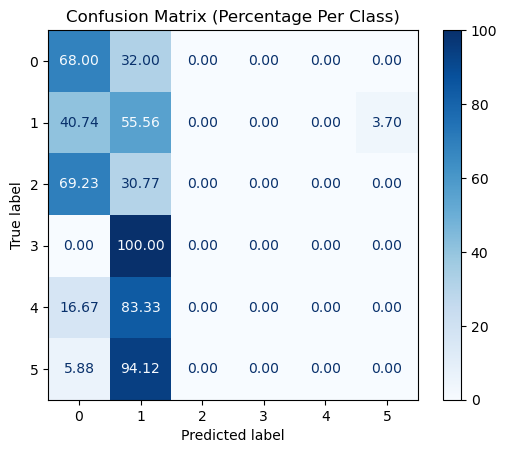

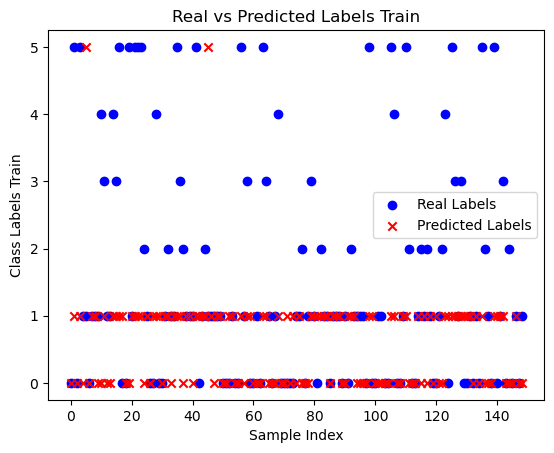

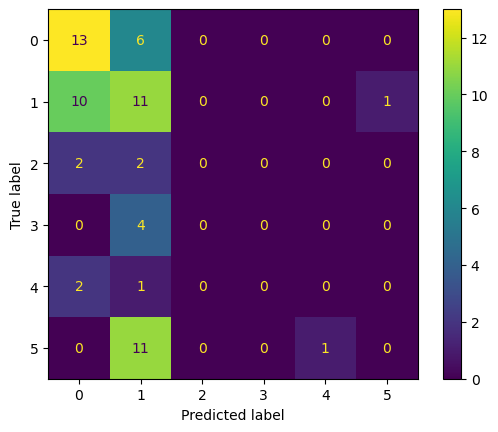

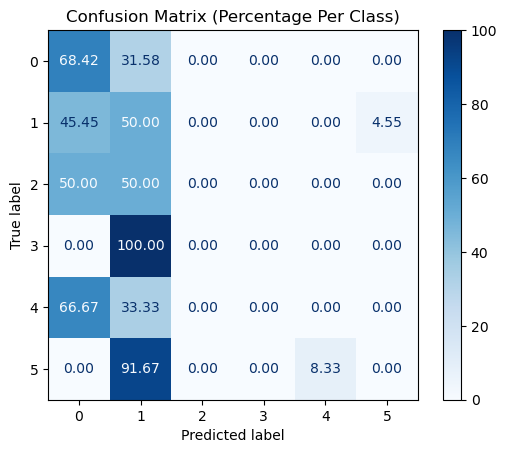

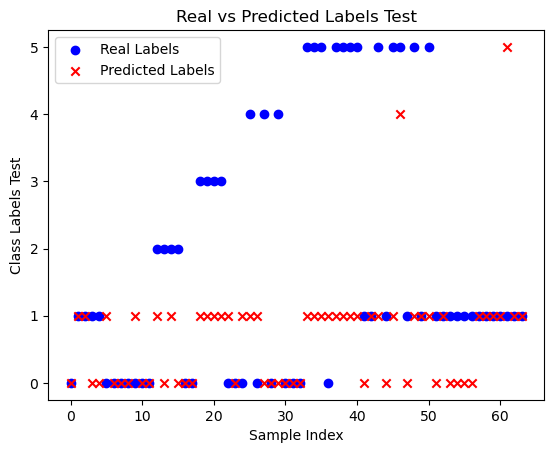

In [244]:
for t in range(epoch):
    error = np.zeros((num_train,n3))
    r     = np.zeros((num_train,n3))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        #fprim
        #A = dfF1(net3,alpha3, beta3, gamma3, delta3, theta31, theta32, theta33,theta34)
        B = dfF1(net2,alpha2, beta2, gamma2, delta2, theta21, theta22, theta23,theta24)
        B = np.diag(B)
        C = dfF1(net1,alpha1, beta1, gamma1, delta1, theta11, theta12, theta13,theta14)
        C = np.diag(C)


        #Backpropagation
        #layer3
        gradw3       = -1*(k1+k2)*np.outer((target-o3),o2)
        Vgradw3      = beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3      = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3  = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3  = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = -1*(target-o3)
        Vgradbi3     = beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3     = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3         -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)
        
        #layer2
        gradw2       = -1*(k1+k2)*np.outer(np.dot(np.dot((target - o3), w3), B), o1)
        Vgradw2      = beta1*Vgradw2  + (1-beta1)*gradw2 
        Sgradw2      = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2          -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), B).reshape(n2)
        Vgradbi2      = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2      = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2          -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1a(net2, theta21))
        Vgradalpha2      = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2      = beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2          -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1b(net2, theta22))
        Vgradbeta2      = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2      = beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2          -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1g(net2, theta23))
        Vgradgamma2      = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2      = beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2          -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        graddelta2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1d(net2, theta24))
        Vgraddelta2      = beta1*Vgraddelta2  + (1-beta1)*graddelta2 
        Sgraddelta2      = beta2*Sgraddelta2  + (1-beta2)*(graddelta2)**2
        V_hatgraddelta2  = Vgraddelta2 /(1-beta1**(t+1))
        S_hatgraddelta2  = Sgraddelta2 /(1-beta2**(t+1))
        delta2          -= (eta*V_hatgraddelta2)/(np.sqrt(S_hatgraddelta2)+epsilon)
        
        gradtheta21  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t2(net2,beta2,theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22 = beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23 = beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)
        
        gradtheta24  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t4(net2,delta2,theta24))
        Vgradtheta24 = beta1*Vgradtheta24  + (1-beta1)*gradtheta24 
        Sgraddelta24 = beta2*Sgradtheta24  + (1-beta2)*(gradtheta24)**2
        V_hatgradtheta24  = Vgradtheta24 /(1-beta1**(t+1))
        S_hatgradtheta24  = Sgradtheta24 /(1-beta2**(t+1))
        theta24     -= (eta*V_hatgradtheta24)/(np.sqrt(S_hatgradtheta24)+epsilon)
    
        #layer1
        gradw1      = -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1 = beta2*Sgradw1  + (1-beta2)*(gradw1 )**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))
        w1        -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1     = -1*(k1+k2)*np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))
        bi1       -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1  = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1a(net1, theta11))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1     -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1   =-1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1b(net1, theta12))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1= beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1/(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1/(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1  = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1g(net1, theta13))
        Vgradgamma1 = beta1*Vgradgamma1 + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1  + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        graddelta1  = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1d(net1, theta14))
        Vgraddelta1 = beta1*Vgraddelta1  + (1-beta1)*graddelta2 
        Sgraddelta1= beta2*Sgraddelta1  + (1-beta2)*(graddelta1)**2
        V_hatgraddelta1  = Vgraddelta1 /(1-beta1**(t+1))
        S_hatgraddelta1  = Sgraddelta1 /(1-beta2**(t+1))
        delta1     -= (eta*V_hatgraddelta1)/(np.sqrt(S_hatgraddelta1)+epsilon)
        
        gradtheta11 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t1(net1,alpha1, theta11))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t2(net1,beta1, theta12))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta12     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t3(net1,gamma1, theta13))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)
        
        gradtheta14 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t4(net1,delta1, theta14))
        Vgradtheta14 = beta1*Vgradtheta14  + (1-beta1)*gradtheta14 
        Sgraddelta14 = beta2*Sgradtheta14  + (1-beta2)*(gradtheta14)**2
        V_hatgradtheta14  = Vgradtheta14 /(1-beta1**(t+1))
        S_hatgradtheta14  = Sgradtheta14 /(1-beta2**(t+1))
        theta14     -= (eta*V_hatgradtheta14)/(np.sqrt(S_hatgradtheta14)+epsilon)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train, n3))
    for i in range(num_train):
        input_data = input_train[i, :]                              
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)         
        target = output_train[i, :]
        output_data_train[i] = o3
        error[i] = -target*np.log(o3)
        #r[i] = (k1+k2)*error[i] - k2*error[i-1]
    mse_train[t] = np.mean(error)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, n3))
    for i in range(num_test):
        input_data = input_test[i, :]  
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3) 
        output_data_test[i] = o3
        target = output_test[i, :]
        error[i] = -target*np.log(o3)
        #r[i] = (k1+k2)*error[i] - k2*error[i-1] 
    mse_test[t] = np.mean(error)


plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2, 3, 4, 5])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")
plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2, 3, 4, 5])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")
plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**initialize ANN Type F2**

In [290]:
n0, n1, n2, n3 = input.shape[1], 50, 18,output.shape[1]
eta = 0.000001
epoch = 500
epsilon = 10**-8 
beta1 = 0.99
beta2 = 0.999

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.2, 0.2
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
delta1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
theta14 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
delta2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)
theta24 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
alpha3 = np.random.uniform(a,b,1)
beta3 = np.random.uniform(a,b,1)
gamma3 = np.random.uniform(a,b,1)
delta3 = np.random.uniform(a,b,1)
theta31 = np.random.uniform(a,b,1)
theta32 = np.random.uniform(a,b,1)
theta33 = np.random.uniform(a,b,1)
theta34 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgraddelta1 = 0
Sgraddelta1 = 0
S_hatgraddelta1 = 0
V_hatgraddelta1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

Vgradtheta14 = 0
Sgradtheta14 = 0
S_hatgradtheta14 = 0
V_hatgradtheta14 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgraddelta2 = 0
Sgraddelta2 = 0
S_hatgraddelta2 = 0
V_hatgraddelta2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

Vgradtheta24 = 0
Sgradtheta24 = 0
S_hatgradtheta24 = 0
V_hatgradtheta24 = 0
####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0

#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
    
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)
    
def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
#F2 for layer1, layer2, layer3
def F2(x, alpha, beta, gamma,t1, t2, t3):
    return alpha*sigmoid(t1*x) + beta* Tanh(t2*x) + gamma* relu(t3*x) 
    
#Fstar
def F2a(x,t):
    return sigmoid(t*x)
def F2b(x,t):
    return Tanh(t*x)
def F2g(x,t):
    return relu(t*x)
   
def F2t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F2t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F2t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)
      
#Fprim
def dfF2(x,alpha, beta, gamma, t1,t2, t3):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x)


def softmax(a):
    e = np.exp(a)
    return e/e.sum()
    

**Implemention ANN Type F2**

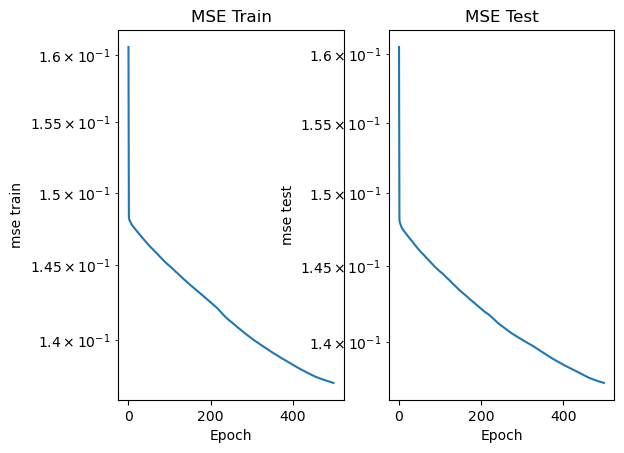

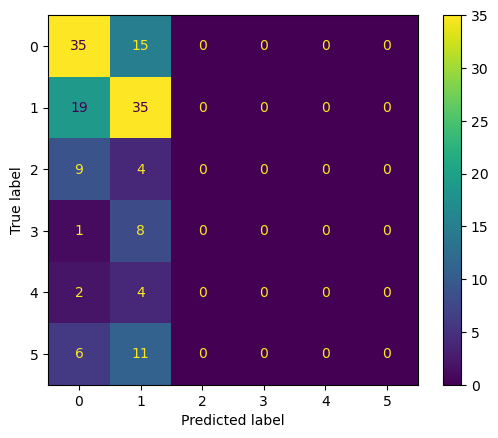

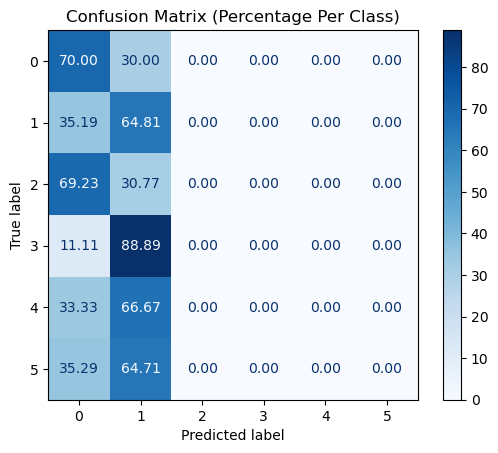

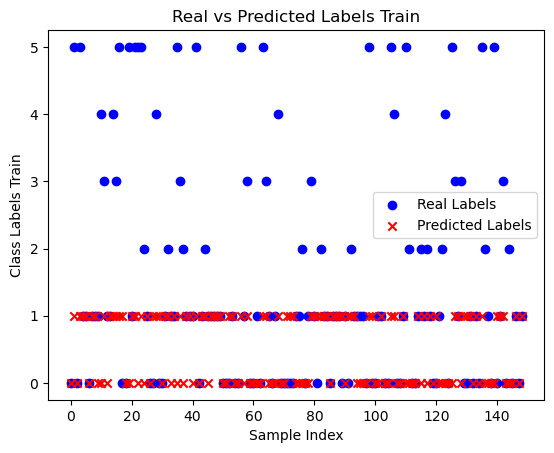

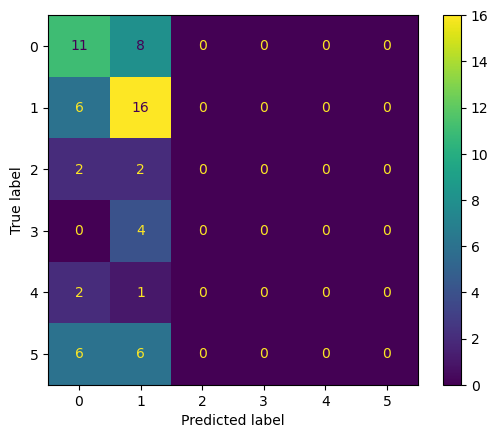

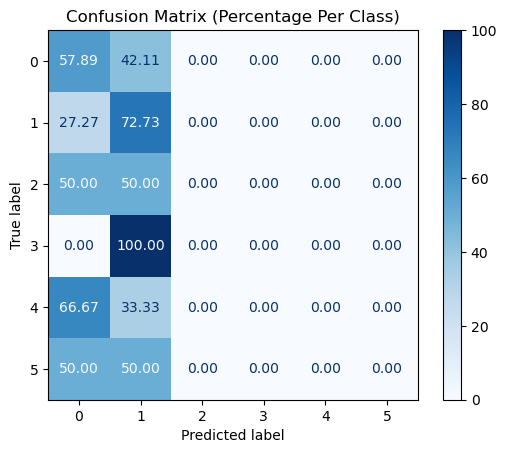

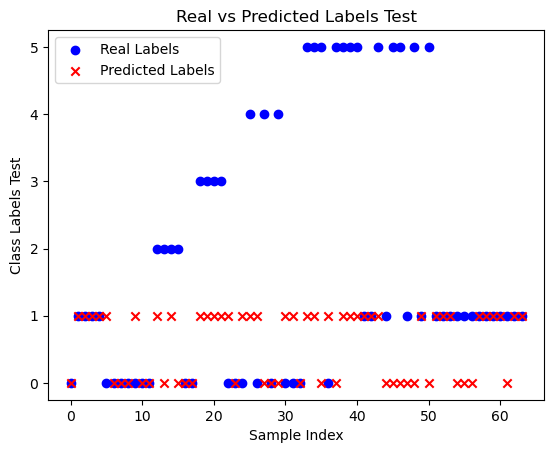

In [293]:
for t in range(epoch):
    error = np.zeros((num_train,6))
    r     = np.zeros((num_train, 6))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1, theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2, theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        #fprim
        #A = dfF1(net3,alpha3, beta3, gamma3, delta3, theta31, theta32, theta33)
        B = dfF2(net2,alpha2, beta2, gamma2,theta21, theta22, theta23)
        B = np.diag(B)
        C = dfF2(net1,alpha1, beta1, gamma1,theta11, theta12, theta13)
        C = np.diag(C)


        #Backpropagation
        #layer3
        gradw3       = -1*(k1+k2)*np.outer((target-o3),o2)
        Vgradw3      = beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3      = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3  = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3  = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = -1*(target-o3)
        Vgradbi3     = beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3     = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3         -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)
        
        #layer2
        gradw2       = -1*(k1+k2)*np.outer(np.dot(np.dot((target - o3), w3), B), o1)
        Sgradw2      = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2          -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), B).reshape(n2)
        Vgradbi2      = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2      = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2          -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2a(net2, theta21))
        Vgradalpha2      = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2      = beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2          -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2b(net2, theta22))
        Vgradbeta2      = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2      = beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2          -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2g(net2, theta23))
        Vgradgamma2      = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2      = beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2          -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        gradtheta21       = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2t1(net2,alpha2,theta21))
        Vgradtheta21      = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21      = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21          -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22 = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2t2(net2,beta2,theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22 = beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23 = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23 = beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)

        #layer1
        gradw1     = -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1 = beta2*Sgradw1  + (1-beta2)*(gradw1 )**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))
        w1        -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1    = -1*(k1+k2)*np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))
        bi1       -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2a(net1, theta11))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1     -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1  =-1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2b(net1, theta12))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1= beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1/(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1/(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2g(net1, theta13))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1  + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        gradtheta11 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2t1(net1,alpha1, theta11))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2t2(net1,beta1, theta12))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2t3(net1,gamma1, theta13))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)


    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train, n3))
    for i in range(num_train):
        input_data = input_train[i, :]        # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)           # 1 * 1
        target = output_train[i, :]
        output_data_train[i] = o3
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

    mse_train[t] = np.mean(r)
    
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, n3))
    for i in range(num_test):
        input_data = input_test[i, :]   # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3) 
        output_data_test[i] = o3
        target = output_test[i, :]
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1] 
    mse_test[t] = np.mean(r)


plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2,3,4,5])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2,3,4,5])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2,3,4,5])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2,3,4,5])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**Seed Dataset**

In [458]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/seed.xlsx")
data_S = df.to_numpy()

In [460]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)
data = data_S

input = data_S[:, :7]
output = data_S[:, 7]
f = input.shape[1]

def normalizeData(input):
  for ii in range(f):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii]) - np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_S)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**initialiaze ANN Type F1**

In [463]:
n0, n1, n2, n3 = input.shape[1], 80, 28,output.shape[1]
eta = 0.00001
epoch = 12
epsilon = 10**-8 
beta1 = 0.9
beta2 = 0.99

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.1, 0.1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
delta1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
theta14 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
delta2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)
theta24 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
alpha3 = np.random.uniform(a,b,1)
beta3 = np.random.uniform(a,b,1)
gamma3 = np.random.uniform(a,b,1)
delta3 = np.random.uniform(a,b,1)
theta31 = np.random.uniform(a,b,1)
theta32 = np.random.uniform(a,b,1)
theta33 = np.random.uniform(a,b,1)
theta34 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgraddelta1 = 0
Sgraddelta1 = 0
S_hatgraddelta1 = 0
V_hatgraddelta1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

Vgradtheta14 = 0
Sgradtheta14 = 0
S_hatgradtheta14 = 0
V_hatgradtheta14 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgraddelta2 = 0
Sgraddelta2 = 0
S_hatgraddelta2 = 0
V_hatgraddelta2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

Vgradtheta24 = 0
Sgradtheta24 = 0
S_hatgradtheta24 = 0
V_hatgradtheta24 = 0
####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0
#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)

def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
def F1(x, alpha, beta, gamma, delta, t1, t2, t3,t4):
    return alpha*sigmoid(t1*x) + beta*Tanh(t2*x) + gamma*relu(t3*x) + delta*purline(t4*x)
#Fstar
def F1a(x,t):
    return sigmoid(t*x)
def F1b(x,t):
    return Tanh(t*x)
def F1g(x,t):
    return relu(t*x)
def F1d(x,t):
    return purline(t*x)
    
def F1t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F1t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F1t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)

def F1t4(x, delat,t):
    return delat*x*dfpurline(t*x)
    
#Fprim
def dfF1(x,alpha, beta, gamma, delta, t1, t2, t3,t4):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x) +t4*delta

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**Implemention ANN Type F1**

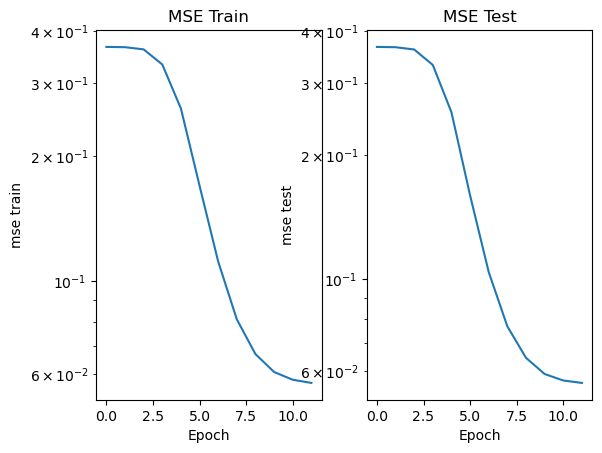

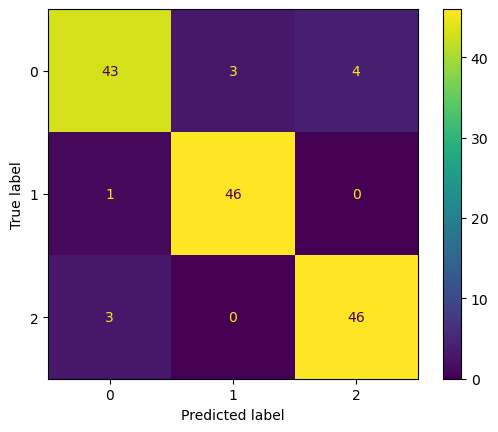

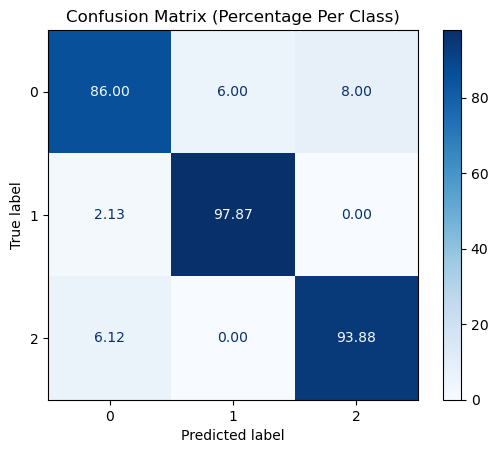

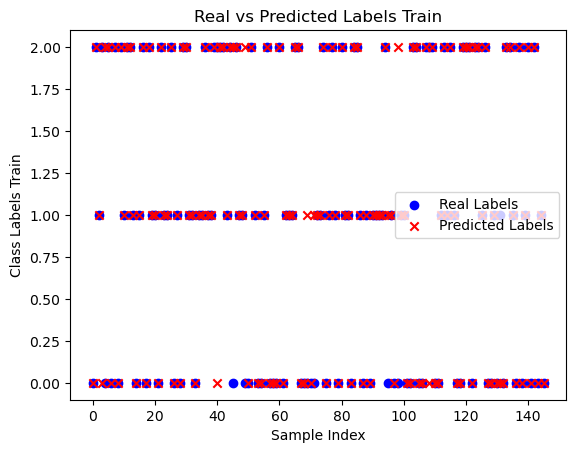

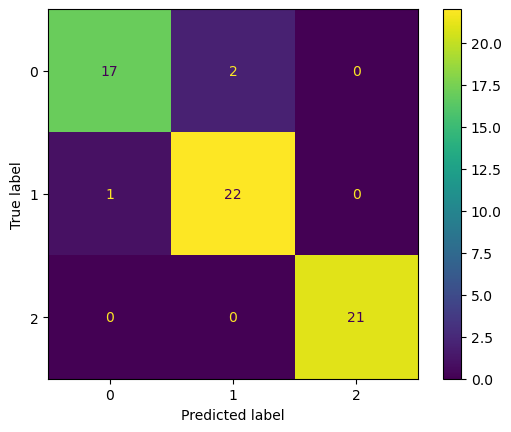

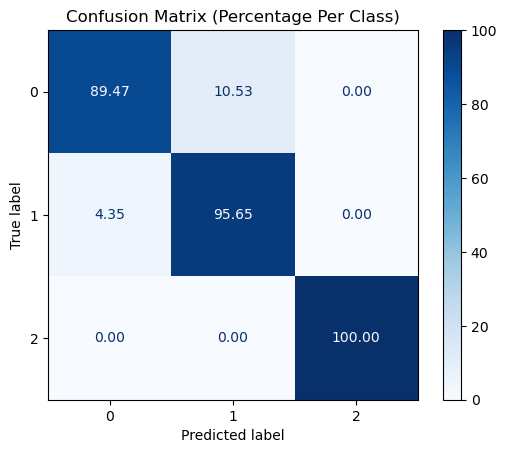

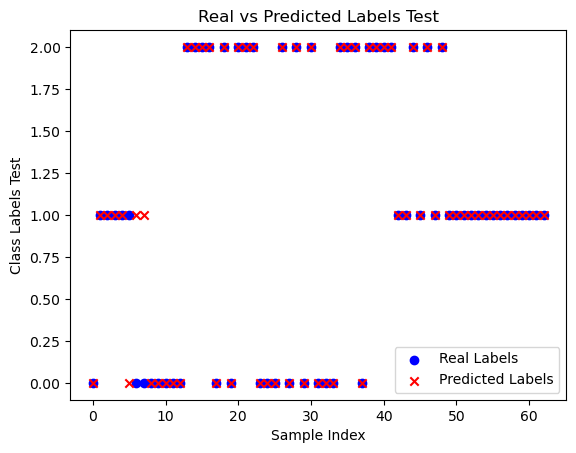

In [466]:
for t in range(epoch):
    error = np.zeros((num_train,n3))
    r     = np.zeros((num_train,n3))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        #fprim
        #A = dfF1(net3,alpha3, beta3, gamma3, delta3, theta31, theta32, theta33,theta34)
        B = dfF1(net2,alpha2, beta2, gamma2, delta2, theta21, theta22, theta23,theta24)
        B = np.diag(B)
        C = dfF1(net1,alpha1, beta1, gamma1, delta1, theta11, theta12, theta13,theta14)
        C = np.diag(C)


        #Backpropagation
        #layer3
        gradw3       = -1*(k1+k2)*np.outer((target-o3),o2)
        Vgradw3= beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3 = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3 = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3 = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = -1*(target-o3)
        Vgradbi3= beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3 = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3          -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)
        
        #layer2
        gradw2       = -1*(k1+k2)*np.outer(np.dot(np.dot((target - o3), w3), B), o1)
        Vgradw2 = beta1*Vgradw2  + (1-beta1)*gradw2 
        Sgradw2 = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2        -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2      = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), B).reshape(n2)
        Vgradbi2 = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2 = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2       -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2   = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1a(net2, theta21))
        Vgradalpha2 = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2= beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2     -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2    = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1b(net2, theta22))
        Vgradbeta2 = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2= beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2      -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2   = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1g(net2, theta23))
        Vgradgamma2 = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2= beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2      -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        graddelta2   = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1d(net2, theta24))
        Vgraddelta2 = beta1*Vgraddelta2  + (1-beta1)*graddelta2 
        Sgraddelta2= beta2*Sgraddelta2  + (1-beta2)*(graddelta2)**2
        V_hatgraddelta2  = Vgraddelta2 /(1-beta1**(t+1))
        S_hatgraddelta2  = Sgraddelta2 /(1-beta2**(t+1))
        delta2     -= (eta*V_hatgraddelta2)/(np.sqrt(S_hatgraddelta2)+epsilon)
        
        gradtheta21  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t2(net2,beta2,theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22 = beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23 = beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)
        
        gradtheta24  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F1t4(net2,delta2,theta24))
        Vgradtheta24 = beta1*Vgradtheta24  + (1-beta1)*gradtheta24 
        Sgraddelta24 = beta2*Sgradtheta24  + (1-beta2)*(gradtheta24)**2
        V_hatgradtheta24  = Vgradtheta24 /(1-beta1**(t+1))
        S_hatgradtheta24  = Sgradtheta24 /(1-beta2**(t+1))
        theta24     -= (eta*V_hatgradtheta24)/(np.sqrt(S_hatgradtheta24)+epsilon)
    
        #layer1
        gradw1      = -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1 = beta2*Sgradw1  + (1-beta2)*(gradw1 )**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))
        w1        -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1     = -1*(k1+k2)*np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))
        bi1       -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1  = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1a(net1, theta11))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1     -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1   =-1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1b(net1, theta12))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1= beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1/(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1/(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1  = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1g(net1, theta13))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1  + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        graddelta1  = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1d(net1, theta14))
        Vgraddelta1 = beta1*Vgraddelta1  + (1-beta1)*graddelta2 
        Sgraddelta1= beta2*Sgraddelta1  + (1-beta2)*(graddelta1)**2
        V_hatgraddelta1  = Vgraddelta1 /(1-beta1**(t+1))
        S_hatgraddelta1  = Sgraddelta1 /(1-beta2**(t+1))
        delta1     -= (eta*V_hatgraddelta1)/(np.sqrt(S_hatgraddelta1)+epsilon)
        
        gradtheta11 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t1(net1,alpha1, theta11))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t2(net1,beta1, theta12))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta12     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t3(net1,gamma1, theta13))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)
        
        gradtheta14 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F1t4(net1,delta1, theta14))
        Vgradtheta14 = beta1*Vgradtheta14  + (1-beta1)*gradtheta14 
        Sgraddelta14 = beta2*Sgradtheta14  + (1-beta2)*(gradtheta14)**2
        V_hatgradtheta14  = Vgradtheta14 /(1-beta1**(t+1))
        S_hatgradtheta14  = Sgradtheta14 /(1-beta2**(t+1))
        theta14     -= (eta*V_hatgradtheta14)/(np.sqrt(S_hatgradtheta14)+epsilon)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train, n3))
    for i in range(num_train):
        input_data = input_train[i, :]                              
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)         
        target = output_train[i, :]
        output_data_train[i] = o3
        error[i] = -target*np.log(o3)
        #r[i] = (k1+k2)*error[i] - k2*error[i-1]
    mse_train[t] = np.mean(error)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, n3))
    for i in range(num_test):
        input_data = input_test[i, :]  
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F1(net1, alpha1, beta1, gamma1, delta1, theta11, theta12, theta13, theta14)
        net2 = np.dot(w2, o1) + bi2
        o2 = F1(net2, alpha2, beta2, gamma2, delta2, theta21, theta22, theta23, theta24)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3) 
        output_data_test[i] = o3
        target = output_test[i, :]
        error[i] = -target*np.log(o3)
        #r[i] = (k1+k2)*error[i] - k2*error[i-1] 
    mse_test[t] = np.mean(error)


plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")
plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")
plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**initialize ANN Type F2**

In [565]:
n0, n1, n2, n3 = input.shape[1], 80, 16,output.shape[1]
eta = 0.00001
epoch = 100
epsilon = 10**-8 
beta1 = 0.9
beta2 = 0.99

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -0.1, 0.1
k1, k2 = 0.6, 0.4

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a,b,(n1, n0))
bi1 = np.random.uniform(a,b,n1)
alpha1 = np.random.uniform(a,b,1)
beta1 = np.random.uniform(a,b,1)
gamma1 = np.random.uniform(a,b,1)
delta1 = np.random.uniform(a,b,1)
theta11 = np.random.uniform(a,b,1)
theta12 = np.random.uniform(a,b,1)
theta13 = np.random.uniform(a,b,1)
theta14 = np.random.uniform(a,b,1)
net1 = np.zeros(n1)
o1 = np.zeros(n1)


#layer 2 information
w2 = np.random.uniform(a,b,(n2, n1))
bi2 = np.random.uniform(a,b,n2)
net2 = np.zeros(n2)
o2 = np.zeros(n2)
alpha2 = np.random.uniform(a,b,1)
beta2 = np.random.uniform(a,b,1)
gamma2 = np.random.uniform(a,b,1)
delta2 = np.random.uniform(a,b,1)
theta21 = np.random.uniform(a,b,1)
theta22 = np.random.uniform(a,b,1)
theta23 = np.random.uniform(a,b,1)
theta24 = np.random.uniform(a,b,1)

#layer 3 information
w3 = np.random.uniform(a,b,(n3, n2))
bi3 = np.random.uniform(a,b,n3)
net3 = np.zeros(n3)
o3 = np.zeros(n3)
alpha3 = np.random.uniform(a,b,1)
beta3 = np.random.uniform(a,b,1)
gamma3 = np.random.uniform(a,b,1)
delta3 = np.random.uniform(a,b,1)
theta31 = np.random.uniform(a,b,1)
theta32 = np.random.uniform(a,b,1)
theta33 = np.random.uniform(a,b,1)
theta34 = np.random.uniform(a,b,1)
# layer1
Vgradw1 = 0
Sgradw1 = 0
S_hatgradw1 = 0
V_hatgradw1 = 0

Vgradbi1 = 0
Sgradbi1 = 0
S_hatgradbi1 = 0
V_hatgradbi1 = 0

Vgradalpha1 = 0
Sgradalpha1 = 0
S_hatgradalpha1 = 0
V_hatgradalpha1 = 0


Vgradbeta1 = 0
Sgradbeta1 = 0
S_hatgradbeta1 = 0
V_hatgradbeta1 = 0

Vgradgamma1 = 0
Sgradgamma1 = 0
S_hatgradgamma1 = 0
V_hatgradgamma1 = 0

Vgraddelta1 = 0
Sgraddelta1 = 0
S_hatgraddelta1 = 0
V_hatgraddelta1 = 0

Vgradtheta11 = 0
Sgradtheta11 = 0
S_hatgradtheta11 = 0
V_hatgradtheta11 = 0

Vgradtheta12 = 0
Sgradtheta12 = 0
S_hatgradtheta12 = 0
V_hatgradtheta22 = 0

Vgradtheta13 = 0
Sgradtheta13 = 0
S_hatgradtheta13 = 0
V_hatgradtheta13 = 0

Vgradtheta14 = 0
Sgradtheta14 = 0
S_hatgradtheta14 = 0
V_hatgradtheta14 = 0

#####################################################################
#layer2
Vgradw2 = 0
Sgradw2 = 0
S_hatgradw2 = 0
V_hatgradw2 = 0

Vgradbi2 = 0
Sgradbi2 = 0
S_hatgradbi2 = 0
V_hatgradbi2 = 0

Vgradalpha2 = 0
Sgradalpha2 = 0
S_hatgradalpha2 = 0
V_hatgradalpha2 = 0


Vgradbeta2 = 0
Sgradbeta2 = 0
S_hatgradbeta2 = 0
V_hatgradbeta2 = 0

Vgradgamma2 = 0
Sgradgamma2 = 0
S_hatgradgamma2 = 0
V_hatgradgamma2 = 0

Vgraddelta2 = 0
Sgraddelta2 = 0
S_hatgraddelta2 = 0
V_hatgraddelta2 = 0

Vgradtheta21 = 0
Sgradtheta21 = 0
S_hatgradtheta21 = 0
V_hatgradtheta21 = 0

Vgradtheta22 = 0
Sgradtheta22 = 0
S_hatgradtheta22 = 0
V_hatgradtheta22 = 0

Vgradtheta23 = 0
Sgradtheta23 = 0
S_hatgradtheta23 = 0
V_hatgradtheta23 = 0

Vgradtheta24 = 0
Sgradtheta24 = 0
S_hatgradtheta24 = 0
V_hatgradtheta24 = 0
####################################################################
#layer3
Vgradw3 = 0
Sgradw3 = 0
S_hatgradw3 = 0
V_hatgradw3 = 0

Vgradbi3 = 0
Sgradbi3 = 0
S_hatgradbi3 = 0
V_hatgradbi3 = 0

#*******************************************************************
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
def purline(x):
  return x
    
def relu(x):
  return np.maximum(0, x)
    
#**********************************************************************
def dfrelu(x):
    return np.where(x > 0, 1, 0)
    
def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1
#*************************************************************************
#F2 for layer1, layer2, layer3
def F2(x, alpha, beta, gamma,t1, t2, t3):
    return alpha*sigmoid(t1*x) + beta* Tanh(t2*x) + gamma* relu(t3*x) 
    
#Fstar
def F2a(x,t):
    return sigmoid(t*x)
def F2b(x,t):
    return Tanh(t*x)
def F2g(x,t):
    return relu(t*x)
   
def F2t1(x,alpha,t):
    return alpha*x*dfsigmoid(t*x)
    
def F2t2(x,beta,t):
    return beta*x* dfTanh(t*x)

def F2t3(x,gamma,t):
    return gamma*x*dfrelu(t*x)
      
#Fprim
def dfF2(x,alpha, beta, gamma, t1,t2, t3):
    return t1*alpha*dfsigmoid(t1*x)+ t2*beta*dfTanh(t2*x)+ t3*gamma*dfrelu(t3*x)


def softmax(a):
    e = np.exp(a)
    return e/e.sum()
    

**Implemention ANN Type F2**

C:\Users\ISD\AppData\Local\Temp\ipykernel_9968\1474412589.py:191: RuntimeWarning: overflow encountered in square
  return np.exp(-x)/(1 + np.exp(-x))**2
C:\Users\ISD\AppData\Local\Temp\ipykernel_9968\1474412589.py:194: RuntimeWarning: overflow encountered in square
  return 4/(np.exp(x) + np.exp(-x))**2


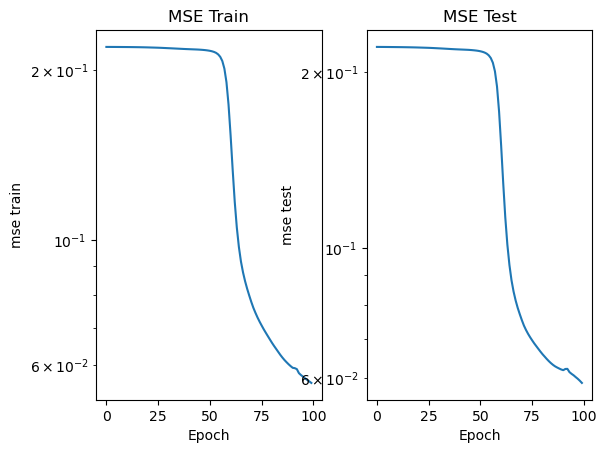

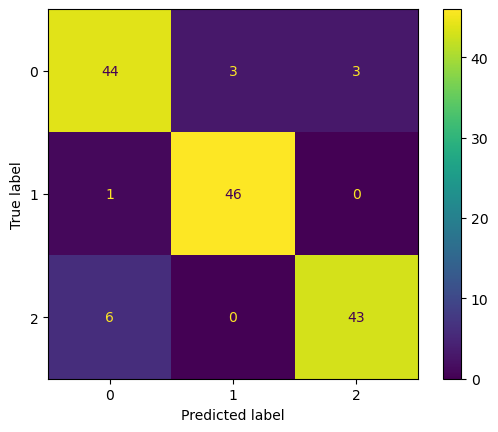

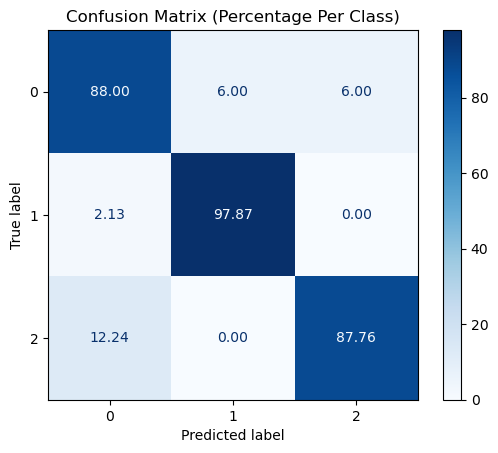

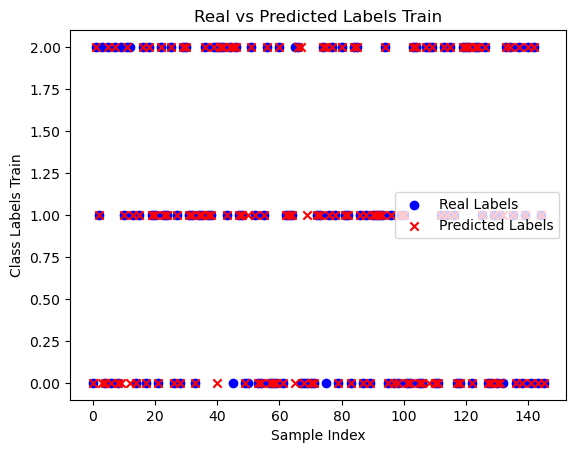

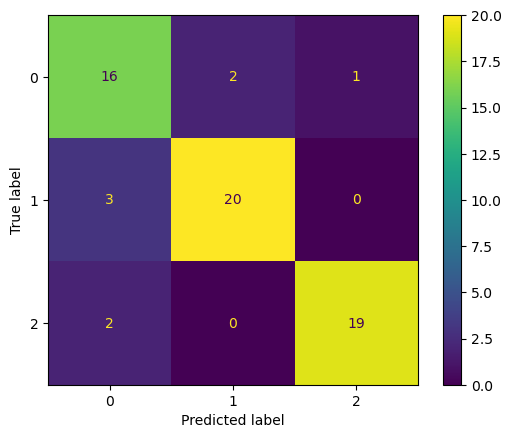

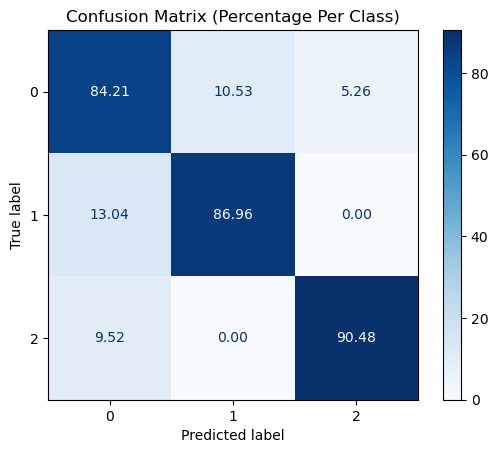

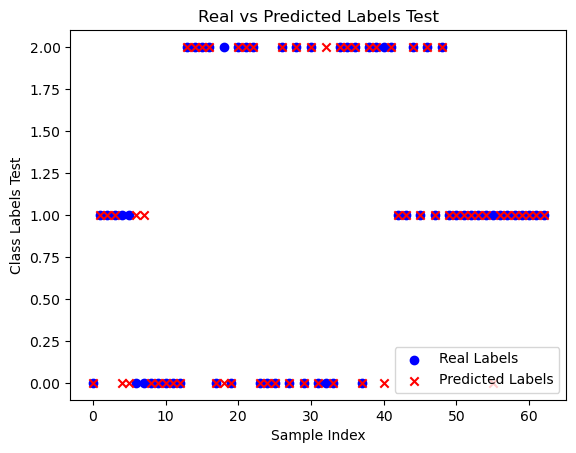

In [568]:
for t in range(epoch):
    error = np.zeros((num_train,n3))
    r     = np.zeros((num_train, n3))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1, theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2, theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        
        #fprim
        #A = dfF1(net3,alpha3, beta3, gamma3, delta3, theta31, theta32, theta33)
        B = dfF2(net2,alpha2, beta2, gamma2,theta21, theta22, theta23)
        B = np.diag(B)
        C = dfF2(net1,alpha1, beta1, gamma1,theta11, theta12, theta13)
        C = np.diag(C)


        #Backpropagation
        #layer3
        gradw3       = -1*(k1+k2)*np.outer((target-o3),o2)
        Vgradw3= beta1*Vgradw3 + (1-beta1)*gradw3
        Sgradw3 = beta2*Sgradw3 + (1-beta2)*(gradw3)**2
        V_hatgradw3 = Vgradw3/(1-beta1**(t+1))
        S_hatgradw3 = Sgradw3/(1-beta2**(t+1))
        w3          -= (eta*V_hatgradw3)/(np.sqrt(S_hatgradw3)+epsilon)
        
        gradbi3      = -1*(target-o3)
        Vgradbi3= beta1*Vgradbi3 + (1-beta1)*gradbi3
        Sgradbi3 = beta2*Sgradbi3 + (1-beta2)*(gradbi3)**2
        V_hatgradbi3 = Vgradbi3/(1-beta1**(t+1))
        S_hatgradbi3 = Sgradbi3/(1-beta2**(t+1))
        bi3          -= (eta*V_hatgradbi3 )/(np.sqrt(S_hatgradbi3 )+epsilon)
        
        #layer2
        gradw2     = -1*(k1+k2)*np.outer(np.dot(np.dot((target - o3), w3), B), o1)
        Sgradw2 = beta2*Sgradw2  + (1-beta2)*(gradw2 )**2
        V_hatgradw2  = Vgradw2 /(1-beta1**(t+1))
        S_hatgradw2  = Sgradw2 /(1-beta2**(t+1))
        w2        -= (eta*V_hatgradw2)/(np.sqrt(S_hatgradw2)+epsilon)
        
        gradbi2    = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), B).reshape(n2)
        Vgradbi2 = beta1*Vgradbi2  + (1-beta1)*gradbi2 
        Sgradbi2 = beta2*Sgradbi2  + (1-beta2)*(gradbi2)**2
        V_hatgradbi2  = Vgradbi2 /(1-beta1**(t+1))
        S_hatgradbi2  = Sgradbi2 /(1-beta2**(t+1))
        bi2       -= (eta*V_hatgradbi2)/(np.sqrt(S_hatgradbi2)+epsilon)
        
        gradalpha2 = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2a(net2, theta21))
        Vgradalpha2 = beta1*Vgradalpha2  + (1-beta1)*gradalpha2 
        Sgradalpha2= beta2*Sgradalpha2  + (1-beta2)*(gradalpha2)**2
        V_hatgradalpha2  = Vgradalpha2 /(1-beta1**(t+1))
        S_hatgradalpha2  = Sgradalpha2 /(1-beta2**(t+1))
        alpha2     -= (eta*V_hatgradalpha2)/(np.sqrt(S_hatgradalpha2)+epsilon)
        
        gradbeta2  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2b(net2, theta22))
        Vgradbeta2 = beta1*Vgradbeta2  + (1-beta1)*gradbeta2 
        Sgradbeta2= beta2*Sgradbeta2  + (1-beta2)*(gradbeta2)**2
        V_hatgradbeta2  = Vgradbeta2/(1-beta1**(t+1))
        S_hatgradbeta2  = Sgradbeta2/(1-beta2**(t+1))
        beta2      -= (eta*V_hatgradbeta2)/(np.sqrt(S_hatgradbeta2)+epsilon)
        
        gradgamma2  = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2g(net2, theta23))
        Vgradgamma2 = beta1*Vgradgamma2  + (1-beta1)*gradgamma2 
        Sgradgamma2= beta2*Sgradgamma2  + (1-beta2)*(gradgamma2)**2
        V_hatgradgamma2  = Vgradgamma2 /(1-beta1**(t+1))
        S_hatgradgamma2  = Sgradgamma2 /(1-beta2**(t+1))
        gamma2      -=(eta*V_hatgradgamma2)/(np.sqrt(S_hatgradgamma2)+epsilon)
        
        gradtheta21 = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2t1(net2,alpha2,theta21))
        Vgradtheta21 = beta1*Vgradtheta21  + (1-beta1)*gradtheta21 
        Sgraddelta21 = beta2*Sgradtheta21  + (1-beta2)*(gradtheta21)**2
        V_hatgradtheta21  = Vgradtheta21 /(1-beta1**(t+1))
        S_hatgradtheta21  = Sgradtheta21 /(1-beta2**(t+1))
        theta21     -= (eta*V_hatgradtheta21)/(np.sqrt(S_hatgradtheta21)+epsilon)
        
        gradtheta22 = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2t2(net2,beta2,theta22))
        Vgradtheta22 = beta1*Vgradtheta22  + (1-beta1)*gradtheta22 
        Sgraddelta22 = beta2*Sgradtheta22  + (1-beta2)*(gradtheta22)**2
        V_hatgradtheta22  = Vgradtheta22 /(1-beta1**(t+1))
        S_hatgradtheta22  = Sgradtheta22 /(1-beta2**(t+1))
        theta22     -= (eta*V_hatgradtheta22)/(np.sqrt(S_hatgradtheta22)+epsilon)
        
        gradtheta23 = -1*(k1+k2)*np.dot(np.dot((target - o3), w3), F2t3(net2,gamma2,theta23))
        Vgradtheta23 = beta1*Vgradtheta23  + (1-beta1)*gradtheta23 
        Sgraddelta23 = beta2*Sgradtheta23  + (1-beta2)*(gradtheta23)**2
        V_hatgradtheta23  = Vgradtheta23 /(1-beta1**(t+1))
        S_hatgradtheta23  = Sgradtheta23 /(1-beta2**(t+1))
        theta23     -= (eta*V_hatgradtheta23)/(np.sqrt(S_hatgradtheta23)+epsilon)

        #layer1
        gradw1     = -1*(k1+k2)*np.outer(np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C),input_data)
        Vgradw1 = beta1*Vgradw1  + (1-beta1)*gradw1 
        Sgradw1 = beta2*Sgradw1  + (1-beta2)*(gradw1 )**2
        V_hatgradw1  = Vgradw1 /(1-beta1**(t+1))
        S_hatgradw1  = Sgradw1 /(1-beta2**(t+1))
        w1        -= (eta*V_hatgradw1)/(np.sqrt(S_hatgradw1)+epsilon)
        
        gradbi1    = -1*(k1+k2)*np.dot(np.dot(np.dot((target - o3),w3), np.dot(B, w2)),C).reshape(n1)
        Vgradbi1 = beta1*Vgradbi1  + (1-beta1)*gradbi1
        Sgradbi1 = beta2*Sgradbi1  + (1-beta2)*(gradbi1)**2
        V_hatgradbi1  = Vgradbi1 /(1-beta1**(t+1))
        S_hatgradbi1  = Sgradbi1 /(1-beta2**(t+1))
        bi1       -= (eta*V_hatgradbi1)/(np.sqrt(S_hatgradbi1)+epsilon)
        
        gradalpha1 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2a(net1, theta11))
        Vgradalpha1 = beta1*Vgradalpha1  + (1-beta1)*gradalpha1 
        Sgradalpha1= beta2*Sgradalpha1  + (1-beta2)*(gradalpha1)**2
        V_hatgradalpha1  = Vgradalpha1 /(1-beta1**(t+1))
        S_hatgradalpha1  = Sgradalpha1 /(1-beta2**(t+1))
        alpha1     -= (eta*V_hatgradalpha1)/(np.sqrt(S_hatgradalpha1)+epsilon)
        
        gradbeta1  =-1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2b(net1, theta12))
        Vgradbeta1 = beta1*Vgradbeta1  + (1-beta1)*gradbeta1 
        Sgradbeta1= beta2*Sgradbeta1  + (1-beta2)*(gradbeta1)**2
        V_hatgradbeta1  = Vgradbeta1/(1-beta1**(t+1))
        S_hatgradbeta1  = Sgradbeta1/(1-beta2**(t+1))
        beta1      -= (eta*V_hatgradbeta1)/(np.sqrt(S_hatgradbeta1)+epsilon)
        
        gradgamma1 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2g(net1, theta13))
        Vgradgamma1 = beta1*Vgradgamma1  + (1-beta1)*gradgamma1 
        Sgradgamma1= beta2*Sgradgamma1  + (1-beta2)*(gradgamma1)**2
        V_hatgradgamma1  = Vgradgamma1 /(1-beta1**(t+1))
        S_hatgradgamma1  = Sgradgamma1 /(1-beta2**(t+1))
        gamma1      -=(eta*V_hatgradgamma1)/(np.sqrt(S_hatgradgamma1)+epsilon)
        
        gradtheta11 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2t1(net1,alpha1, theta11))
        Vgradtheta11 = beta1*Vgradtheta11  + (1-beta1)*gradtheta11 
        Sgraddelta11 = beta2*Sgradtheta11  + (1-beta2)*(gradtheta11)**2
        V_hatgradtheta11  = Vgradtheta11 /(1-beta1**(t+1))
        S_hatgradtheta11  = Sgradtheta11 /(1-beta2**(t+1))
        theta11     -= (eta*V_hatgradtheta11)/(np.sqrt(S_hatgradtheta11)+epsilon)
        
        gradtheta12 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2t2(net1,beta1, theta12))
        Vgradtheta12 = beta1*Vgradtheta12  + (1-beta1)*gradtheta12 
        Sgraddelta12 = beta2*Sgradtheta12  + (1-beta2)*(gradtheta12)**2
        V_hatgradtheta12  = Vgradtheta12 /(1-beta1**(t+1))
        S_hatgradtheta12  = Sgradtheta12 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta12)/(np.sqrt(S_hatgradtheta12)+epsilon)
        
        gradtheta13 = -1*(k1+k2)*np.dot(np.dot(np.dot((target -o3), w3),np.dot(B,w2)),F2t3(net1,gamma1, theta13))
        Vgradtheta13 = beta1*Vgradtheta13  + (1-beta1)*gradtheta13 
        Sgraddelta13 = beta2*Sgradtheta13  + (1-beta2)*(gradtheta13)**2
        V_hatgradtheta13  = Vgradtheta13 /(1-beta1**(t+1))
        S_hatgradtheta13  = Sgradtheta13 /(1-beta2**(t+1))
        theta13     -= (eta*V_hatgradtheta13)/(np.sqrt(S_hatgradtheta13)+epsilon)



    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train, n3))
    for i in range(num_train):
        input_data = input_train[i, :]        # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1,input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)           # 1 * 1
        target = output_train[i, :]
        output_data_train[i] = o3
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

    mse_train[t] = np.mean(r)
    
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, n3))
    for i in range(num_test):
        input_data = input_test[i, :]   # 1*3      W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1
        o1 = F2(net1, alpha1, beta1, gamma1,theta11, theta12, theta13)
        net2 = np.dot(w2, o1) + bi2
        o2 = F2(net2, alpha2, beta2, gamma2,theta21, theta22, theta23)
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3) 
        output_data_test[i] = o3
        target = output_test[i, :]
        error[i] = -target*np.log(o3)
        r[i] = (k1+k2)*error[i] - k2*error[i-1] 
    mse_test[t] = np.mean(r)


plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1, 2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()
